In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-dataset/uber-rides-dataset.csv


# Comlete EDA about UBER Dataset

# # Data Exploration

In [2]:
df = pd.read_csv("../input/uber-dataset/uber-rides-dataset.csv")
df

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,...,9.29,2015-05-11T17:26:00,12,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,...,9.93,2015-05-11T18:46:00,10,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,...,18.01,2015-05-13T09:15:00,14,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none
3,"May 16, 2015 at 1:44AM",Completed,Uber,49613a86a04e6c15d72b51d1a2935d81,d3f73f8151c2e8c34b541f961db7f5fa,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,...,5.10,2015-05-16T00:24:00,3,3,0.84,0.87,0.56,partly-cloudy-night,Partly Cloudy,none
4,"May 16, 2015 at 3:18AM",Completed,Uber,9896148fdecdb4c5d977a8691510bdb6,1287d21e6455ee40d4861f6b91c680f4,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,...,21.92,2015-05-16T01:29:00,3,1,0.90,1.61,0.31,partly-cloudy-night,Partly Cloudy,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,"April 23, 2018 at 12:11PM",Completed,Uber,ce5bdea8e9c366b2f9f9cdf1bb879965,e96ad9d6f2f0b2c55b2fa2c284507543,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2018-04-23 11:59:00,2018-04-23 12:11:00,00:10:37,...,5.79,2018-04-23T11:59:00,6,4,0.39,2.57,0.18,clear-day,Clear,none
674,"April 24, 2018 at 02:58PM",Completed,Uber,3a1df88ce67d8f749ac5f09da8b4dadf,e63e621e61b493e119239f5ff635810d,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2018-04-24 14:21:00,2018-04-24 14:58:00,00:23:41,...,11.46,2018-04-24T14:21:00,7,3,0.62,5.37,0.48,partly-cloudy-day,Partly Cloudy,none
675,"April 26, 2018 at 03:57PM",Completed,Uber,1879ce44367d4cc555479253323ec36d,b65196da38435a1dbe8e9009b514a7b8,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2018-04-26 15:22:00,2018-04-26 15:57:00,00:16:20,...,6.68,2018-04-26T15:22:00,8,6,0.76,4.02,0.9,partly-cloudy-day,Mostly Cloudy,none
676,"April 26, 2018 at 05:00PM",Completed,Uber,7a237cb245b6ca854498ecb7c842beb3,2af94300321de81edc1eeef8c041fd9a,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2018-04-26 16:37:00,2018-04-26 17:00:00,00:19:19,...,7.48,2018-04-26T16:37:00,9,7,0.68,4.28,0.79,partly-cloudy-day,Mostly Cloudy,none


1. To find shape of datasets

In [3]:
df.shape

(678, 45)

> It shows that there are 678 rows & 45 columns

2. df.info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_completed_at      678 non-null    object 
 1   trip_status            678 non-null    object 
 2   ride_hailing_app       678 non-null    object 
 3   trip_uid               678 non-null    object 
 4   driver_uid             678 non-null    object 
 5   rider_uid              678 non-null    object 
 6   customer               678 non-null    object 
 7   trip_start_time        678 non-null    object 
 8   trip_end_time          678 non-null    object 
 9   trip_time              678 non-null    object 
 10  total_time             678 non-null    object 
 11  wait_time              678 non-null    object 
 12  trip_type              678 non-null    object 
 13  surge_multiplier       643 non-null    float64
 14  vehicle_make_model     678 non-null    object 
 15  vehicl

* >  So we can conclude that our dataset contains null-valuse in surge_multiplier.bcz it has 643 non-null.
* > And trip start,trip end and other time values are in the object(str) dtype, so we  need to convert it to datetime formate.

3.The describe() method computes and displays summary statistics for a Python dataframe.The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types. 

In [5]:
df.describe()

,surge_multiplier,pickup_lat,pickup_long,dropoff_lat,dropoff_long,rub_usd_exchange_rate,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed
count,643.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,1.011353,59.756784,31.740062,59.758561,31.739366,60.517463,5.061593,10.057788,5.327434,3.002950,0.778083,3.541519
std,0.096085,0.800432,6.063872,0.799396,6.062101,4.526606,4.251843,8.735132,9.996551,11.912408,0.164886,1.737701
min,1.000000,55.605800,30.168447,55.599648,29.947507,49.260000,0.840000,0.010000,-22.000000,-29.000000,0.250000,0.050000
25%,1.000000,59.932134,30.364931,59.933576,30.366456,57.230000,2.760000,4.912500,-2.000000,-5.750000,0.690000,2.350000
50%,1.000000,59.941415,30.366456,59.941415,30.368724,59.010000,3.735000,7.290000,3.000000,0.000000,0.820000,3.500000
75%,1.000000,59.960492,30.420179,59.961987,30.417860,64.637500,5.670000,11.665000,14.000000,14.000000,0.900000,4.660000
max,2.900000,60.126500,60.809913,60.126957,60.809916,79.360000,33.550000,46.740000,32.000000,32.000000,1.000000,8.670000


4.To find Numerical and Object dtype from our datasets. 

In [6]:
num_data= df.select_dtypes(include=np.number)
num_data

,surge_multiplier,pickup_lat,pickup_long,dropoff_lat,dropoff_long,rub_usd_exchange_rate,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed
0,1.0,60.031438,30.329826,59.963131,30.307655,51.28,5.17,9.29,12,12,0.69,4.81
1,1.0,59.963014,30.307313,60.031351,30.329495,51.28,4.97,9.93,10,10,0.70,6.53
2,1.0,60.031529,30.329416,59.924281,30.387561,49.50,13.01,18.01,14,14,0.61,5.25
3,2.9,59.959883,30.311159,59.934680,30.308489,49.53,25.99,5.10,3,3,0.84,0.87
4,1.4,59.934813,30.308553,60.031470,30.329402,49.53,13.43,21.92,3,1,0.90,1.61
...,...,...,...,...,...,...,...,...,...,...,...,...
673,1.0,59.939274,30.416977,59.946200,30.474258,61.82,2.60,5.79,6,4,0.39,2.57
674,1.0,59.941415,30.366456,60.011173,30.386566,61.54,3.92,11.46,7,3,0.62,5.37
675,1.0,59.941415,30.366456,59.916832,30.450724,62.68,2.78,6.68,8,6,0.76,4.02
676,1.0,59.916862,30.451020,59.941415,30.366456,62.68,3.33,7.48,9,7,0.68,4.28


Syntax for selecting perticular datatype:-"DataFrame.select_dtypes(include=None, exclude=None)"

Where, include & exclude:-means 
        A selection of dtypes or strings to be included/excluded. At least one of these parameters must be supplied.

In [7]:
num_data.shape[1]

12

* >  shape[0],means prints shape of rows.
* >  shape[1],means prints shape of columns.
* >  we have 12 numerical columns out of 45 columns

In [8]:
obj_data= df.select_dtypes(include=object)
obj_data.shape[1]

33

Here we can attach shape predictor to object  data, we can get directly 33 columns out of 45 columns

# Data Cleaning

General Steps we follow in the Data Cleaning process are:-
* Step 1: Remove duplicate or irrelevant observations.
* Step 2: Fix structural errors.
* Step 3: Filter unwanted outliers.
* Step 4: Handle missing data.
* Step 5: Validate and QA.

In [9]:
df.columns

Index(['trip_completed_at', 'trip_status', 'ride_hailing_app', 'trip_uid',
       'driver_uid', 'rider_uid', 'customer', 'trip_start_time',
       'trip_end_time', 'trip_time', 'total_time', 'wait_time', 'trip_type',
       'surge_multiplier', 'vehicle_make_model', 'vehicle_license_plate',
       'driver_name_en', 'vehicle_make', 'vehicle_model', 'driver_gender',
       'driver_photo_url', 'driver_phone_number', 'pickup_lat', 'pickup_long',
       'dropoff_lat', 'dropoff_long', 'trip_map_image_url',
       'trip_path_image_url', 'city', 'country', 'trip_start_address',
       'trip_end_address', 'rub_usd_exchange_rate', 'price_rub', 'price_usd',
       'distance_kms', 'temperature_time', 'temperature_value', 'feels_like',
       'humidity', 'wind_speed', 'cloudness', 'weather_main', 'weather_desc',
       'precipitation'],
      dtype='object')

Here we have want to delete unnecessary columns which we won't use for analysis.  

In [10]:
new_df= df.drop(columns=['trip_uid','driver_uid', 'rider_uid','trip_map_image_url',
                                       'trip_path_image_url','feels_like','vehicle_license_plate',
                                       'driver_photo_url', 'surge_multiplier','vehicle_make_model',
                                       'rub_usd_exchange_rate', 'price_rub','trip_type','vehicle_license_plate',
                                      'temperature_time','trip_completed_at','trip_time',
                                       'total_time', 'driver_phone_number', 'pickup_lat', 'pickup_long',
                                       'dropoff_lat', 'dropoff_long'])
new_df

,trip_status,ride_hailing_app,customer,trip_start_time,trip_end_time,wait_time,driver_name_en,vehicle_make,vehicle_model,driver_gender,...,trip_end_address,price_usd,distance_kms,temperature_value,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,Completed,Uber,stantyan,2015-05-11 17:26:00,2015-05-11 17:55:00,00:07:27,Maksim,Ford,Focus,Male,...,"Bolshoy prospekt PS, 74, Sankt-Peterburg, Russ...",5.17,9.29,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,Completed,Uber,stantyan,2015-05-11 18:46:00,2015-05-11 19:12:00,00:06:33,Sergey,Hyundai,Solaris,Male,...,"ulitsa Esenina, 1 корпус 1, Sankt-Peterburg, R...",4.97,9.93,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,Completed,Uber,stantyan,2015-05-13 09:15:00,2015-05-13 10:38:00,00:16:07,Oleg,Renault,Fluence,Male,...,"ploshchad' Aleksandra Nevskogo, 2, Sankt-Peter...",13.01,18.01,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none
3,Completed,Uber,stantyan,2015-05-16 00:24:00,2015-05-16 00:44:00,00:06:23,Maksim,Mercedes-Benz,E-Class,Male,...,"Voznesenskiy prospekt, 3, Sankt-Peterburg, Rus...",25.99,5.10,3,0.84,0.87,0.56,partly-cloudy-night,Partly Cloudy,none
4,Completed,Uber,stantyan,2015-05-16 01:29:00,2015-05-16 02:18:00,00:10:06,Eduard,Hyundai,Solaris,Male,...,"ulitsa Esenina, 3 корпус 1, Sankt-Peterburg, R...",13.43,21.92,3,0.90,1.61,0.31,partly-cloudy-night,Partly Cloudy,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,Completed,Uber,stantyan,2018-04-23 11:59:00,2018-04-23 12:11:00,00:01:23,Sergey,Hyundai,Solaris,Male,...,"Industrial'nyy Prospekt, 24, лит. А, St Peters...",2.60,5.79,6,0.39,2.57,0.18,clear-day,Clear,none
674,Completed,Uber,stantyan,2018-04-24 14:21:00,2018-04-24 14:58:00,00:13:19,Aleksandr,Dongfeng,H30,Male,...,"Gzhatskaya Ulitsa, 22, Sankt-Peterburg, Russia...",3.92,11.46,7,0.62,5.37,0.48,partly-cloudy-day,Partly Cloudy,none
675,Completed,Uber,stantyan,2018-04-26 15:22:00,2018-04-26 15:57:00,00:18:40,Akmal,Chevrolet,Aveo,Male,...,"Ulitsa Dzhona Rida, 2, Sankt-Peterburg, Russia...",2.78,6.68,8,0.76,4.02,0.9,partly-cloudy-day,Mostly Cloudy,none
676,Completed,Uber,stantyan,2018-04-26 16:37:00,2018-04-26 17:00:00,00:03:41,Evgeniy,Skoda,Rapid,Male,...,"Paradnaya Ulitsa, 3, Sankt-Peterburg, Russia, ...",3.33,7.48,9,0.68,4.28,0.79,partly-cloudy-day,Mostly Cloudy,none


In [11]:
new_df.shape[1]

23

We can see that total column is reduced from 45 to 23.

****Convert the trip_start_time from object datatype to datetime datatype by using to_datetime()

In [12]:

new_df['trip_start_time']= pd.to_datetime(new_df['trip_start_time'])
new_df['trip_end_time']= pd.to_datetime(new_df['trip_end_time'])

> Syntax:-Pandas to_datetime() method helps to convert string Date time into Python Date time object.
* So our data was converted into datetime dtype

****Extract Year, Month_name, day, day_name & hour from 'trip_start_time'

In [13]:
new_df['year']=new_df['trip_start_time'].dt.year
new_df['month']=new_df['trip_start_time'].dt.month_name()
new_df['day']=new_df['trip_start_time'].dt.day
new_df['day of the week']=new_df['trip_start_time'].dt.day_name()
new_df['hour']=new_df['trip_start_time'].dt.hour

Code Explanation:-
* Syntax:- Series.dt.year
* Series.dt can be used to access the values of the series as datetime and return several properties. 
1. Series.dt.year attribute return a numpy array containing year of the datetime in the underlying data of the given series object.
2. Series.dt.month_name() attribute return a numpy array containing month name of the datetime in the underlying data of the given series object.
3. Series.dt.day attribute return a numpy array containing day(number of days) of the datetime in the underlying data of the given series object. 
4. Series.dt.day_name attribute return a numpy array containing name of the day of the datetime in the underlying data of the given series object. 
5. Series.dt.hour attribute return a numpy array containing hour of the datetime in the underlying data of the given series object. 

In [14]:
# to find the trip duration, we subtract the trip_start_time from the trip_end_time.
new_df['trip duration']= new_df['trip_end_time'] - new_df['trip_start_time']

In [15]:
# convert the trip duration to minutes using the lambda function
new_df['Diff Min']=new_df['trip duration'].apply(lambda x:x/np.timedelta64(1, 'm'))

Explanation of above code :-
1.  pd.apply():-Pandas.apply helps to segregate data according to the conditions.And allow the users to pass a function(i,e,,x/1 minute) and apply it on every single value(.'. we use lamda to acess all the elements) of the Pandas series.

2. lambda:-We can use the apply() function to apply the lambda function to both rows and columns of a dataframe. If the axis argument in the apply() function is 0, then the lambda function gets applied to each column, and if 1, then the function gets applied to each row.
* > A lambda function can take any number of arguments, but can only have one expression.
* > Syntax:-lambda arguments : expression
* > Example:-Add 10 to argument a, and return the result:
> x = lambda a : a + 10
> print(x(5)) 
> Ans=15   read for more"https://www.w3schools.com/python/python_lambda.asp"

3. np.timedelta64:-The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
* The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.
* One detail of the datetime64 and timedelta64 objects is that they are built on a fundamental time unit(i,e,, in sec).
* timedelta64(1, 'm'):-The arguments for timedelta64 are a number, to represent the number of units(1), and a date/time unit, such as (D)ay, (M)onth, (Y)ear, (h)ours, (m)inutes, or (s)econds.Therefore it means 1 minutes.

4. df.['trip duration'].apply(lambda x:x/np.timedelta64(1, 'm')):- 
> * where x is nothing but trip duration.Here timedelta is used to convert duration into secounds. 
> * So in order to convert it to minute we need to divide it by 1_minutes((1, 'm')) is nothing but 60 sec.
> * Finally we need to use apply(), in order to apply(). It will used to apply the lambda condition for every trip duration. And assing this column as 'Diff Min'. 



In [16]:
#the formular for speed = distance/time
new_df['Speed']= new_df['distance_kms']/ (new_df['Diff Min']/60)               #we divide Diff Min with 60 bcz in order to convert it to sec.

****To find time of the day i,e,, Morning, afternoon & Evening, we need to initialize time for predicting whether it is morning or afternoon or Evening. 

In [17]:


a= pd.to_datetime(['00:00:00']).time           #It is morning b/w 0 to 12.
b = pd.to_datetime(['12:00:00']).time          #It is Afternoon b/w 12 to 18.
c = pd.to_datetime(['18:00:00']).time          #It is Evening b/w 18 to 0.



In [18]:
#We need to crete function to define Morning, afternoon & Evening
def morning_noon_evening(x):
    # This conditional loop shows that if the start time is between 1  and 12 indicate morning
    # and if  the start time is between 12 and 6 indicate noon
    # else every other should be evening
    if x['trip_start_time'].time() >= a and x['trip_start_time'].time() <b:   #This method returns a float value which represents the time in seconds since the epoch.   
        return 'Morning'
    elif x['trip_start_time'].time() >= b and x['trip_start_time'].time()  <c:
        return 'Noon'
    else:
        return 'Evening'
 # use the apply function to create another column   
new_df['Morning_Noon_Evening']=new_df.apply(morning_noon_evening, axis=1)  #axis=1 or ‘columns’: apply function to each row.
                                                                           #axis=0 or ‘index’: apply function to each column.
new_df    

,trip_status,ride_hailing_app,customer,trip_start_time,trip_end_time,wait_time,driver_name_en,vehicle_make,vehicle_model,driver_gender,...,precipitation,year,month,day,day of the week,hour,trip duration,Diff Min,Speed,Morning_Noon_Evening
0,Completed,Uber,stantyan,2015-05-11 17:26:00,2015-05-11 17:55:00,00:07:27,Maksim,Ford,Focus,Male,...,none,2015,May,11,Monday,17,0 days 00:29:00,29.0,19.220690,Noon
1,Completed,Uber,stantyan,2015-05-11 18:46:00,2015-05-11 19:12:00,00:06:33,Sergey,Hyundai,Solaris,Male,...,none,2015,May,11,Monday,18,0 days 00:26:00,26.0,22.915385,Evening
2,Completed,Uber,stantyan,2015-05-13 09:15:00,2015-05-13 10:38:00,00:16:07,Oleg,Renault,Fluence,Male,...,none,2015,May,13,Wednesday,9,0 days 01:23:00,83.0,13.019277,Morning
3,Completed,Uber,stantyan,2015-05-16 00:24:00,2015-05-16 00:44:00,00:06:23,Maksim,Mercedes-Benz,E-Class,Male,...,none,2015,May,16,Saturday,0,0 days 00:20:00,20.0,15.300000,Morning
4,Completed,Uber,stantyan,2015-05-16 01:29:00,2015-05-16 02:18:00,00:10:06,Eduard,Hyundai,Solaris,Male,...,none,2015,May,16,Saturday,1,0 days 00:49:00,49.0,26.840816,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,Completed,Uber,stantyan,2018-04-23 11:59:00,2018-04-23 12:11:00,00:01:23,Sergey,Hyundai,Solaris,Male,...,none,2018,April,23,Monday,11,0 days 00:12:00,12.0,28.950000,Morning
674,Completed,Uber,stantyan,2018-04-24 14:21:00,2018-04-24 14:58:00,00:13:19,Aleksandr,Dongfeng,H30,Male,...,none,2018,April,24,Tuesday,14,0 days 00:37:00,37.0,18.583784,Noon
675,Completed,Uber,stantyan,2018-04-26 15:22:00,2018-04-26 15:57:00,00:18:40,Akmal,Chevrolet,Aveo,Male,...,none,2018,April,26,Thursday,15,0 days 00:35:00,35.0,11.451429,Noon
676,Completed,Uber,stantyan,2018-04-26 16:37:00,2018-04-26 17:00:00,00:03:41,Evgeniy,Skoda,Rapid,Male,...,none,2018,April,26,Thursday,16,0 days 00:23:00,23.0,19.513043,Noon


# Data Visualization

In [19]:
import matplotlib.pyplot as plt
import plotly.express as px       #Plotly Express is a high-level API for creating figures.
import seaborn as sns
import matplotlib

# Trip Status, Ride Hailing App, Driver Gender And Precipitation analysis

1. Trip Status include Completed and Cancelled trip by drivers.
2. Riding Hailing App means which app is used for "Hail". Here "Hail" means Ride hailing is when a person uses an app to “hail” or request a local driver to pick them up and take them directly to a specific location.
3. Precipitation is nothing but is it Rainy outside or not.

All plots syntax:-
> 1. Syntax for countplot:-seaborn.countplot( x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
> > When we use countplot in subplot we must include "ax" in countplot syntax.i,e,,if we need to plot 1st plot we include "ax=[0,0]",
> > instead of ax=[1,1] we use ax=[0,0],bcz axis index is start from 0 & 1(0->Rows & 1->columns)
> > ax=[1,1] means plot at 2nd row & 2nd column, instead of using ax=[2,2].

> 2. Syntax for subplot:-subplot(m,n,p):- divides the current figure into an m-by-n(m rows & n columns) grid and creates axes in the position specified by p. 

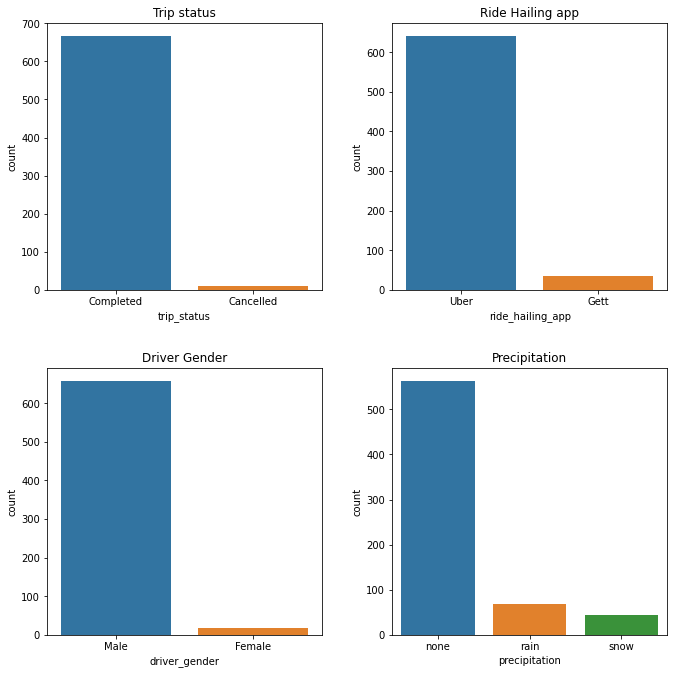

In [20]:
# create a subplots to plot the plot the above variables.
#Syntax for assigning subplot with proper orientation is "fig, ax = plt.subplots()""
fig,axes= plt.subplots(2,2, figsize=(10,10))    #figsize is predefined 10x10
# plot for trip status
axes[0,0].set_title('Trip status')          #We can use other charecterstics like color, palette ,,ect for better visualization 
sns.countplot(data=new_df,
              x='trip_status', 
              ax=axes[0,0])

#plot for riding hailing app
axes[0,1].set_title('Ride Hailing app')
sns.countplot(data=new_df, x='ride_hailing_app',
             ax=axes[0,1])

#plot for Driver Gender
axes[1,0].set_title('Driver Gender')
sns.countplot (data=new_df, x='driver_gender',
              ax=axes[1,0])

# plot for Precipitation
axes[1,1].set_title('Precipitation')
sns.countplot(data=new_df, x='precipitation',
             ax=axes[1,1])

plt.tight_layout(pad=3)

#It is compulsorily use tight_layout(),while in the case using subplot().
#tight-layout to fit plots within your figure cleanly.
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
#It only checks the extents of ticklabels, axis labels, and titles.
#pad=3: This parameter is used for padding between the figure edge and the edges of subplots, as a fraction of the font size.It makes padding of unit 3 around the figure.

Conclusion:-
From the above graphs we can conclude that:-
* > plot Trip Status shows that most of his trips were completed.
* > plot ride hailing app shows that he made use of uber hailing app for most of his trips as against Gelt.
* > plot Driver Gender ahows, he had male drivers for most of his trips.
* > From plot pricipitation we can see that there was "no precipitation" during most of his trips.

# Price_usd, Distance_kms, Temperature_value, Humidity, Wind_speed Analysis

In [21]:
#Extracting Price_usd, Distance_kms, Temperature_value, Humidity, Wind_speed columns
columns=['price_usd','distance_kms', 'temperature_value','humidity', 'wind_speed']

Code Explanation of below:-
* By using for loop we can also indirectly make subplots.
* In this case we need to do univariate_Analysis by using Histogram plot for columns[].
> * Syntax for Histogram in plotly:-fig = px.histogram(data_frame, x=column, nbins, title, lables={'row':'column'}) for more info please read:-"https://plotly.com/python/histograms/"
> * Marginal=box:- is a distribution plots are "small subplots above or to the right of a main plot", which show the "distribution of data along only one dimension". Marginal distribution plot capabilities are built into various Plotly Express functions such as "scatter and histogram"(We can use this for only scatter & histogram) .  

In [22]:
for i in columns:
    fig= px.histogram(data_frame=new_df,x=i,marginal='box',
                      title='{} Distribution'.format(i))
    fig.update_layout(bargap=0.1)
    fig.show()
    
    #In plotly we have update_layout Update the properties of the figure's layout with a dict(dictionary) and/or with keyword arguments.
    #bargap – Sets the gap (in plot fraction) between bars of adjacent location coordinates.
    

note:-
* By using marginal=box we got extra small 1-D box plot above the graph.

Conclusion:-
1. From the price distribution graph we can that the price is skewed within 2 to 5.Therefore almost driver attend passengers giving price b/w 2 to 5 US Dollars

2. The measurement of distance are skewed to the left of distribution plot, around 5- 6kms with few outliers towards the right.

3. From the temperature distribution graph we can say the graph is somewhat normal distribution, with of most of the temperature value concentrated between 0 and 3.

4. The measurement of the wind speed seemed to form a Gaussian distribution centered around 3 with few outliers towards the right.

# Year Analysis

In [23]:
year_df= new_df['year'].value_counts().reset_index().rename(columns={'index':'Year', 'year':'count'})
year_df

,Year,count
0,2017,231
1,2016,175
2,2018,146
3,2015,126


Code Explanation:-
1. value_counts():-In pandas "Series.value_counts()" function return a Series containing counts of unique values(Ex:-how many 2017 is containing in datasets).
* After value_count() operation "year column become count column", which contains frequencies of year.
* Problem is there is no "year" column for representation of count with respect to year(Ex:- see our o/p it has year column wrt count) but not in this case,it contains only count.
* Therefore we need two column, 1st is for 'years' & 2nd for 'count' of years.

2. DataFrame.reset_index():-In order to create two columns,1st is for 'years' & 2nd for 'count of years'we use df.reset_index(),here df is "new_df['year'].value_counts().reset_index()".So we reset the index to "year" column.
* So it will create year column as index.
> * Syntax:- 1)DataFrame.set_index:-Set row labels.
           2)DataFrame.reset_index:-Remove row labels or move them to new columns.Therefore year                                          become the  new index.
* refer this "https://www.geeksforgeeks.org/python-pandas-dataframe-reset_index/"

3. rename():-After the creation of new column "year column it is represented by column_name index" and "count column is done by year column so it's name is same as year".So column_names are not suitable for representation
* So we change the column name by changing,"Index as Year" & "Year as Count"

>   Syntax for rename():-DataFrame.rename(mapper=None, *, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore')
  Where 'index'->rename the index_values. & 'column'->rename the columns.
  Therefore columns={'index':'Year', 'Year':'count'}, means rename  the column names in the place 

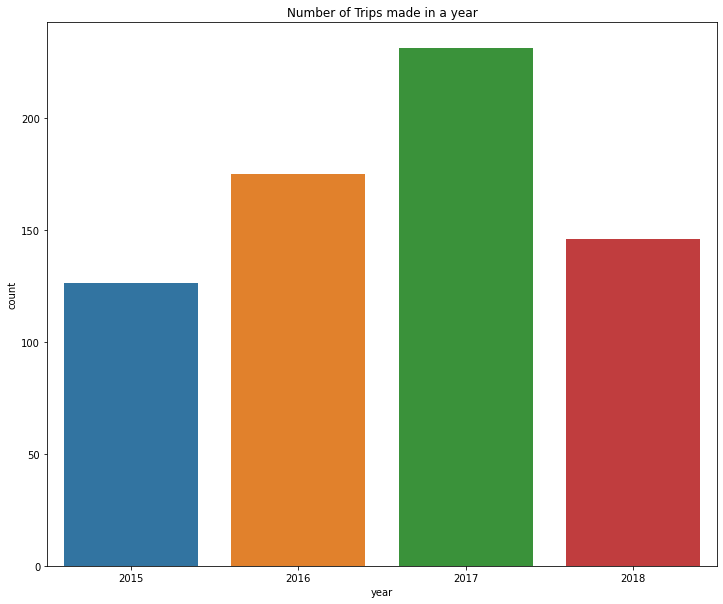

In [24]:
plt.figure(figsize=(12,10))                       #It is used for predefined figure size
plt.title('Number of Trips made in a year')
fig=sns.countplot(data=new_df, x='year')

* >  The highest number of trips was made in 2017

# Months Analysis

Below code Explanation:-
1. Enumerate():-
> * enumerate():-It is used to count the iteration from specified value to length of column,means in the below code we assign enumerate('year',1).
> * enumerate('year',1):-means it will count the values in the column from 1 to length of year column.
> * In our example 4 year values  are given so it will assign index(i_value) from 1 to 4.
> * "https://www.geeksforgeeks.org/enumerate-in-python/"

2. Unique():-It is used for telling enumerate() to index & count unique years not duplicate year.

3. for i,years, in enumerate:-we  know that in enumerate there is 2 columns; 1st one is index(count) we assigned it as i & 2nd one is year & we assigned it as years in for_loop. 
> * Therefore for every iteration in for_loop both i & year values are consider

4. df_out= new_df[new_df['year']==years]:-
> * It is very  important to initialize, which year i need to be consider in whole years  dataframe.
> * Suppose consider from the 1st line  of the code itself, we know years=2015,but
> * in order to plot graph we need to create saperate  data_frame of perticular years_value from the whole data_frame.
> * In our code "new_df[new_df['year'], is the  saperate dataframe" from "whole dataframe new_df['year']"
> * And finally we assign this value as years(==years)


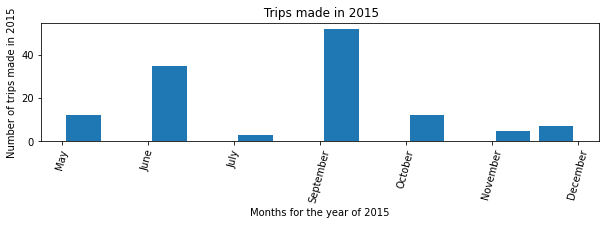

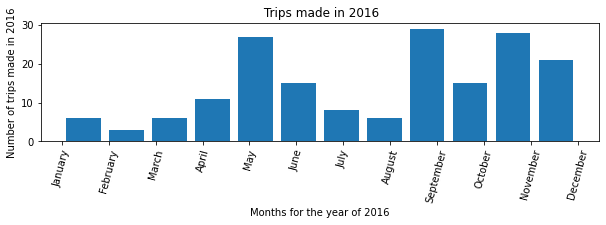

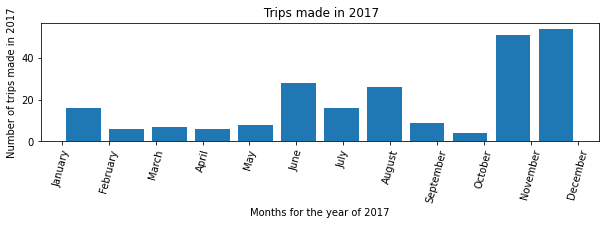

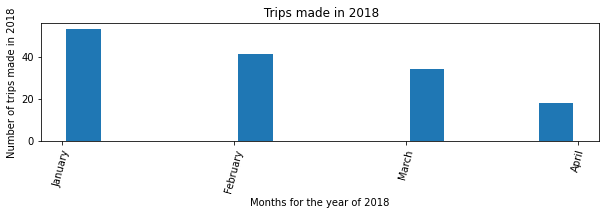

In [25]:
# To to see monthly trips in all years
for i,years, in enumerate(new_df['year'].unique(), 1):
    plt.figure(figsize=(10,10))
    plt.subplot(4,1,i)
    plt.xlabel('Months for the year of {}'.format(years))
    plt.ylabel('Number of trips made in {}'.format(years))
    plt.xticks(rotation=75)
    plt.title(" Trips made in {}". format(years))
    df_out= new_df[new_df['year']==years]
    plt.hist(df_out['month'], rwidth=0.8, bins=12)


# Total Trip in Month

In [26]:
month_df= new_df['month'].value_counts().reset_index().rename(columns={'index':'Month', 'month':'count'})
month_df

,Month,count
0,September,90
1,November,84
2,December,82
3,June,78
4,January,75
5,February,50
6,May,47
7,March,47
8,April,35
9,August,32


<AxesSubplot:title={'center':'Total Monthly Trips'}, xlabel='Month', ylabel='count'>

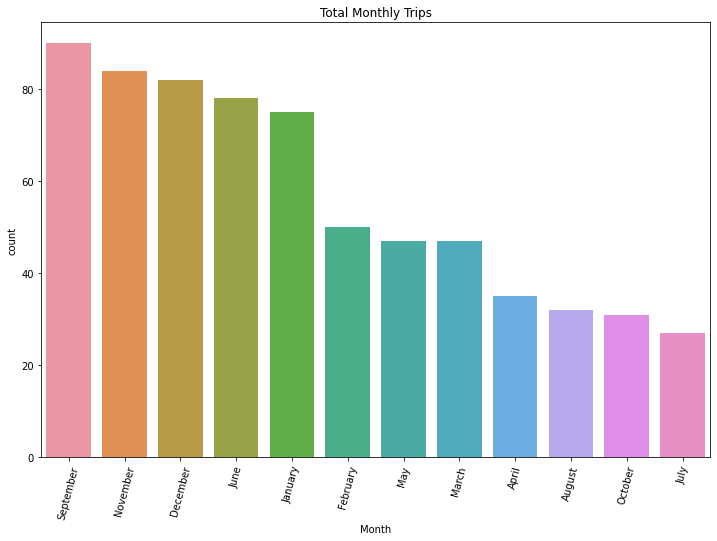

In [27]:
plt.figure(figsize=(12,8))
plt.title('Total Monthly Trips')
plt.xticks(rotation=75)
sns.barplot(data=month_df, y='count', x='Month')

> *Conclusion:-
> > * The highest trip  is  in September month.So the company release more number of CAB's in September to get more profit.
> > * The lowest trip is in July month.So the company reduce the number of CAB's in july.To get less Loss.

# Day Analysis

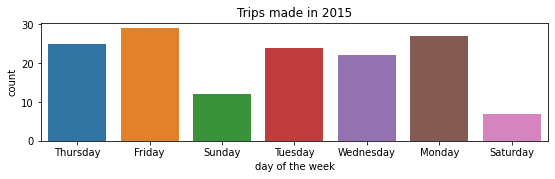

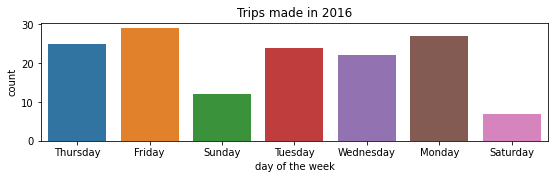

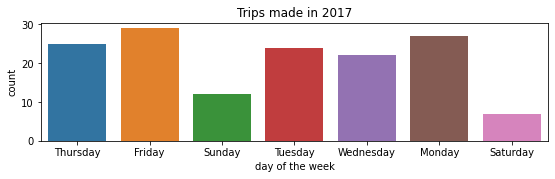

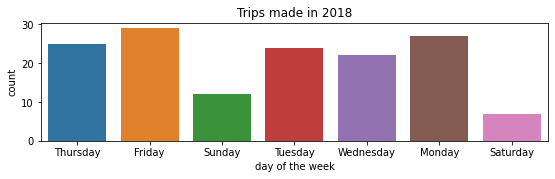

In [28]:
for i ,years, in enumerate(new_df['year'].unique(), 1):
    plt.figure(figsize=(20, 10))
    plt.subplot(4, 2, i)
    plt.ylabel('Number of trips made in {}'.format(years))
    plt.xlabel('Days of the week in the year of {}'.format(years))
    plt.title('Trips made in {}'.format(years))
    sns.countplot(data=df_out, x='day of the week')    #df_out is in the above code
    
    #Syntax : seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    #here also we use df_out, bcz we need to extract days from particular years.So we need to saperate from whole. 
    #x='day of the week':- BCZ we need to find info of days in perticular  year.

In [29]:
day_df= new_df['day of the week'].value_counts().reset_index().rename(columns={'index':'Days', 'day of the week':'count'})
day_df

,Days,count
0,Friday,114
1,Tuesday,109
2,Monday,105
3,Saturday,94
4,Wednesday,92
5,Thursday,87
6,Sunday,77


Conclusion:-
* > Trips in Friday was more compare to other days, so company facilitate more CAB'S on Friday in order to get more profit.
* > Trips in Sunday was very less compare to others days, so company reduce CAB's on Sunday in order to get less Loss.

# CAB Vehicle Company name

<AxesSubplot:title={'center':'Car Company Name'}, xlabel='vehicle_make', ylabel='count'>

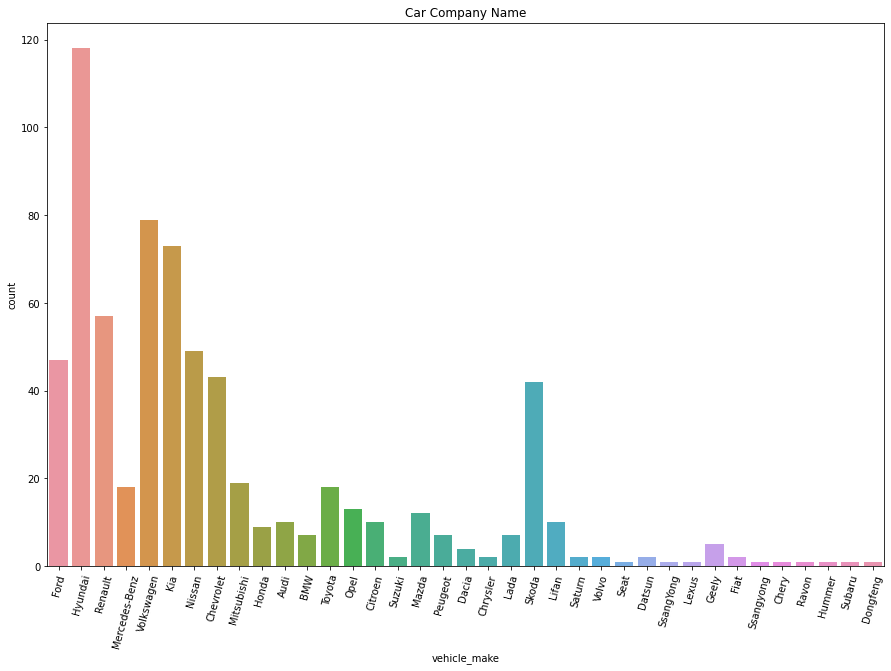

In [30]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=75)
plt.title("Car Company Name")
sns.countplot(data=new_df, x='vehicle_make')            

In [31]:
veh_name_df= new_df['vehicle_make'].value_counts().reset_index().rename(columns={'index':'Car Company', 'vehicle_make':'count'})
veh_name_df

,Car Company,count
0,Hyundai,118
1,Volkswagen,79
2,Kia,73
3,Renault,57
4,Nissan,49
5,Ford,47
6,Chevrolet,43
7,Skoda,42
8,Mitsubishi,19
9,Mercedes-Benz,18


conclusion:-
* > Most of the trip is did from "Hyundai Company Cars".
* > So company should increase of using "Hyundai Company Cars" for getting more profit. 

# CAB Vehicle Model

<AxesSubplot:title={'center':'CAB Vehicle Model'}, xlabel='vehicle_model', ylabel='count'>

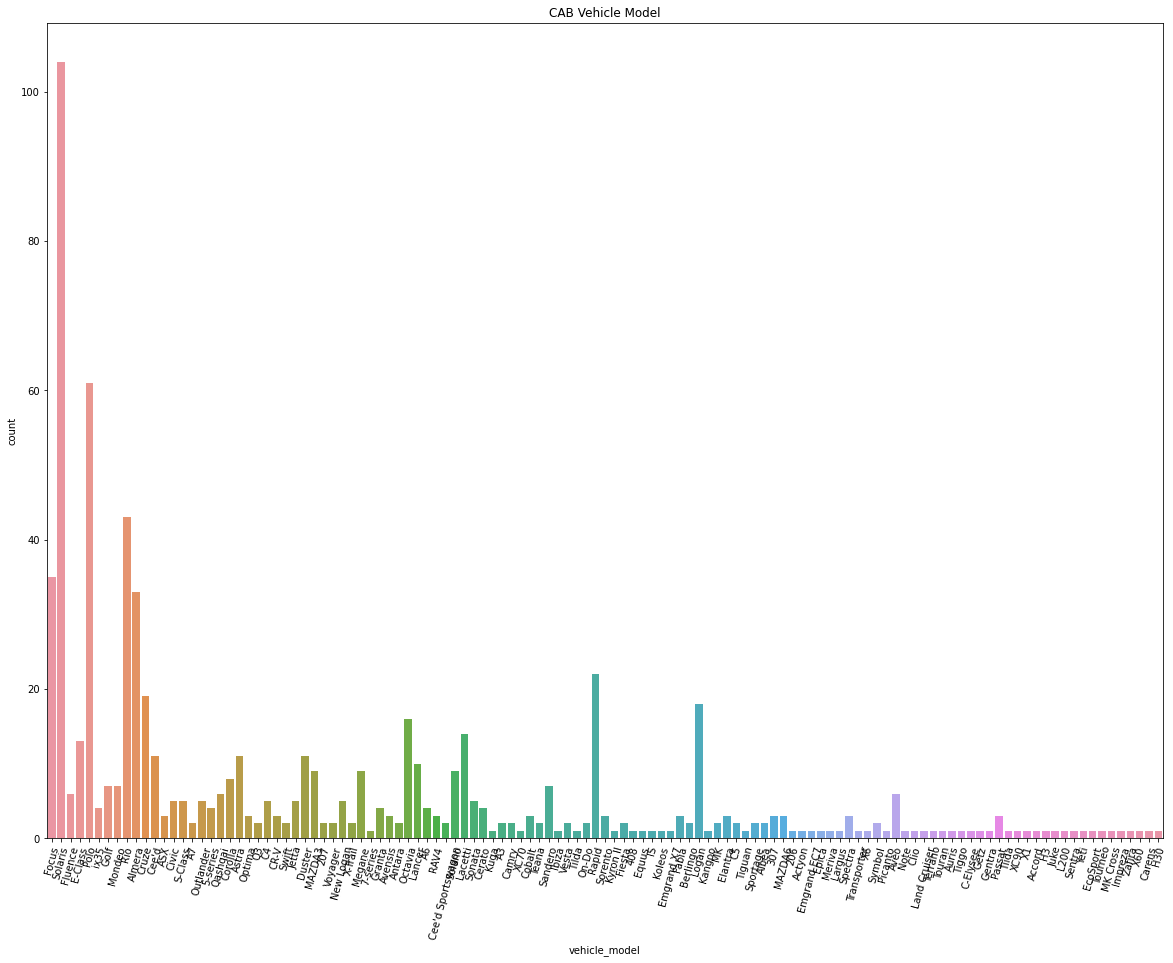

In [32]:
plt.figure(figsize=(20,15))
plt.title("CAB Vehicle Model")
plt.xticks(rotation=75)
sns.countplot(data=new_df, x='vehicle_model')

# Combination of CAB_Company_Name & CAB_Model
By this we can get proper CAB Vehicle Specification for Analysis

Explanation of code:-
* In the below code we need to get proper vehicle specifications with vehicle_name & vehicle_model.
1. Groupby():-Therefore we need to group the vehicle  by both vehicle_name & vehicle_model.So groupby is used.
2. size():- After using Groupby we must and should use any one of Aggregate functions.So here size() is also similar to count. 
> > > size():- calculates number of rows present in each group.similarly to count.
> > > The aggregating function size() computes the size per each group. In this example, the function size() computes the number of rows per each continent.
read this for all kind of aggregate function:-"https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/#:~:text=The%20aggregating%20function%20size(),of%20rows%20per%20each%20continent.&text=Here%20is%20the%20resulting%20dataframe%20after%20applying%20Pandas%20groupby%20operation,the%20aggregating%20function%20size()."


In [33]:
proper_vehicle= new_df.groupby(['vehicle_make', 'vehicle_model']).size().reset_index().rename(columns={0:"Count"}).sort_values(by="Count",ascending=False)
proper_vehicle

,vehicle_make,vehicle_model,Count
40,Hyundai,Solaris,104
115,Volkswagen,Polo,61
49,Kia,Rio,43
25,Ford,Focus,35
67,Nissan,Almera,33
...,...,...,...
30,Geely,Emgrand X7,1
29,Geely,Emgrand EC7,1
89,Renault,Kangoo,1
56,Lexus,IS,1


****Concatenate the string of both vehical_company_name & vehicle_model to make new string name called "Name of Vehicle"

In [34]:
# join the both the vehicle make and vehicle model to form the name of vehicle for getting proper column name of vehicle_specification
proper_vehicle['Name of Vehicle']= proper_vehicle['vehicle_make'].str.cat(proper_vehicle['vehicle_model'], sep=' ')
proper_vehicle


,vehicle_make,vehicle_model,Count,Name of Vehicle
40,Hyundai,Solaris,104,Hyundai Solaris
115,Volkswagen,Polo,61,Volkswagen Polo
49,Kia,Rio,43,Kia Rio
25,Ford,Focus,35,Ford Focus
67,Nissan,Almera,33,Nissan Almera
...,...,...,...,...
30,Geely,Emgrand X7,1,Geely Emgrand X7
29,Geely,Emgrand EC7,1,Geely Emgrand EC7
89,Renault,Kangoo,1,Renault Kangoo
56,Lexus,IS,1,Lexus IS


code Explanation:-
> Syntax for Concatenate strings:-Series.str.cat(others=None, sep=None, na_rep=None, join='left')
* sep:-The separator between the different elements/columns. By default the empty string ‘’ is used.

# Visualization of More Number of Vehicles used for Trips.

In [35]:
fig= px.treemap(proper_vehicle, path=['Name of Vehicle'],
               values='Count',
               color='Count',
              title='Number of Vehicles')
fig.show()

Treemap:-A treemap in Python is a visualization of data that splits a rectangle into sub-parts. The size of each subpart is in proportion to the data it represents. It is somewhat like a pie-chart. Although, treemaps can represent much-more complex data as compared to a pie-chart.A treemap plot represents hierarchial data as nested rectangular sectors.

*path=Name of vehicle:- names or columns of a rectangular dataframe defining the hierarchy of sectors, from root to leaves.Ex:-it shows the name of perticular name of vehical wrt sector.

*values=count:-Values from this column or array_like are used to set values associated to sectors.it is used to display values by cliking on the perticular sector.by clicking "Hyundai Solaris sector" it will shows count value 104.

*color=count:-It assign color for each sector is equal to it's count values.i,e,, for "Hyundai Solaris sector" it will assign color values as 104. Similarly for others.

Conclusion:-
* The above treemap depicts that "Hyundai Solaris" was highly used CAB Vehicle for maximum of times. Therefore company shows more affection about "Hyundai Solaris" vehicles for getting more profit.

# Time of the Day

In [36]:
TOD_count= new_df['Morning_Noon_Evening'].value_counts()
TOD_count

Noon       301
Morning    213
Evening    164
Name: Morning_Noon_Evening, dtype: int64

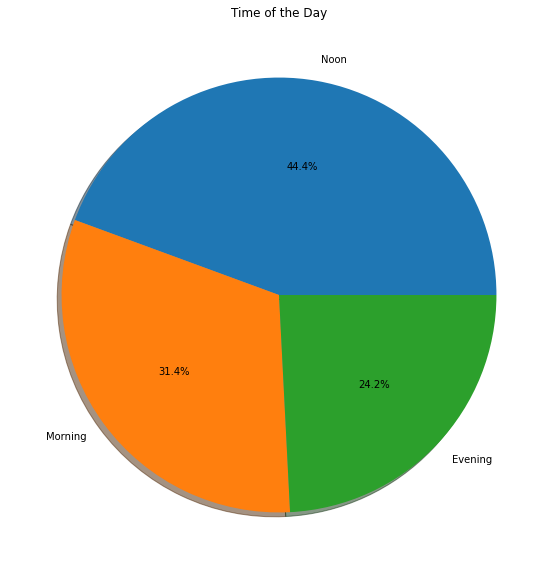

In [37]:
plt.figure(figsize=(10,10))
plt.title('Time of the Day')
plt.pie(TOD_count, labels=TOD_count.index,autopct='%1.1f%%', shadow=True );

Code Explanation:-
1. labels=TOD_count.index:-means that label is used by TOD_count accordind to it's index value, it will label the pie_wedge.i,e,,index 0->noon ,1->morng, 2->Eveg
2. autopct='%1.1f%%':-autopct enables you to display the percent value using Python string formatting.
3. %1.1f%%:-only one value after decimal.


Conclusion:-
* > 44% of the trips were made in the afternoon.This shows peak_hour.So the company increse the fare at afternoon in order to increase the profit.

# Whole year Cost & Distance Analysis

In [38]:
cost_per_year= new_df.groupby('year')[['price_usd']].sum().reset_index()
cost_per_year

,year,price_usd
0,2015,826.77
1,2016,722.28
2,2017,1286.25
3,2018,596.46


In [39]:
avg_cost_per_year=new_df.groupby('year')[['price_usd']].mean().reset_index()
avg_cost_per_year

,year,price_usd
0,2015,6.561667
1,2016,4.127314
2,2017,5.568182
3,2018,4.085342


In [40]:
avg_distance_per_year=new_df.groupby('year')[['distance_kms']].mean().reset_index()
avg_distance_per_year

,year,distance_kms
0,2015,10.489286
1,2016,8.540971
2,2017,11.936450
3,2018,8.531096


****Visualization of whole Year & Distance

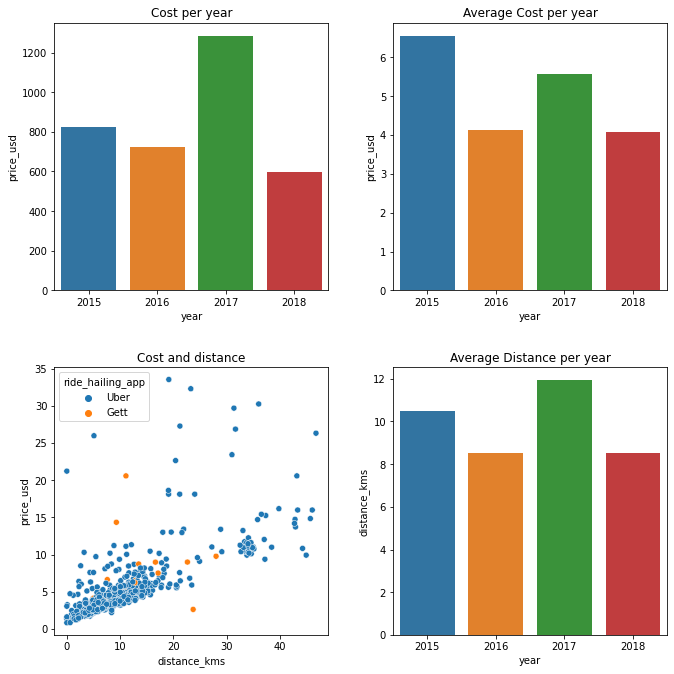

In [41]:
fig,axes=plt.subplots(2, 2, figsize=(10,10))
axes[0,0].set_title('Cost per year')
sns.barplot(data=cost_per_year,x='year', y='price_usd',
           ax=axes[0,0])

axes[0,1].set_title('Average Cost per year')
sns.barplot(data=avg_cost_per_year,x='year', y='price_usd',
           ax=axes[0,1])

axes[1,0].set_title("Cost and distance")
sns.scatterplot(data=new_df, y='price_usd',hue='ride_hailing_app', x='distance_kms',ax=axes[1,0])

axes[1,1].set_title('Average Distance per year')
sns.barplot(data=avg_distance_per_year,x='year', y='distance_kms',
           ax=axes[1,1])

plt.tight_layout(pad=3)          #This codes are explained above 

Conclusion:-
* > The highest cost of trips was made in 2017 but it's average was in 2015.Company got high profit.
* > There is a positive relationship between price and distance covered. This means that, the longer the distance, the higher the price. This particular result is in tune with reality as most of this hailing apps charge based on distance covered.
* > By seeing cost and distance plot, we know that Uber hailing App was used the most for his trips,than others.

  